In [17]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.testing as tm

In [18]:
#ML Packages
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [19]:
# melihat dataset
data = pd.read_csv('https://raw.githubusercontent.com/asrulabdullah99/dataset_dm/master/international_matches.csv')
data
data.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [7]:
data.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


In [8]:
data.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [21]:
drop = ['home_team_score','away_team_score','home_team_goalkeeper_score','away_team_goalkeeper_score','home_team_mean_defense_score','home_team_mean_offense_score','home_team_mean_midfield_score','away_team_mean_defense_score','away_team_mean_offense_score','away_team_mean_midfield_score']
data.drop(drop,inplace=True, axis=1)

In [22]:
data.isnull().sum()

date                           0
home_team                      0
away_team                      0
home_team_continent            0
away_team_continent            0
home_team_fifa_rank            0
away_team_fifa_rank            0
home_team_total_fifa_points    0
away_team_total_fifa_points    0
tournament                     0
city                           0
country                        0
neutral_location               0
shoot_out                      0
home_team_result               0
dtype: int64

In [23]:
data.shape

(23921, 15)

In [12]:
data.values

array([['1993-08-08', 'Bolivia', 'Uruguay', ..., False, 'No', 'Win'],
       ['1993-08-08', 'Brazil', 'Mexico', ..., False, 'No', 'Draw'],
       ['1993-08-08', 'Ecuador', 'Venezuela', ..., False, 'No', 'Win'],
       ...,
       ['2022-06-14', 'Chile', 'Ghana', ..., True, 'Yes', 'Lose'],
       ['2022-06-14', 'Japan', 'Tunisia', ..., False, 'No', 'Lose'],
       ['2022-06-14', 'Korea Republic', 'Egypt', ..., False, 'No', 'Win']],
      dtype=object)

In [24]:
#target distribusi
print(data.groupby('home_team_fifa_rank').size())

home_team_fifa_rank
1      198
2      187
3      209
4      197
5      198
      ... 
207     11
208      8
209     11
210     12
211      6
Length: 211, dtype: int64


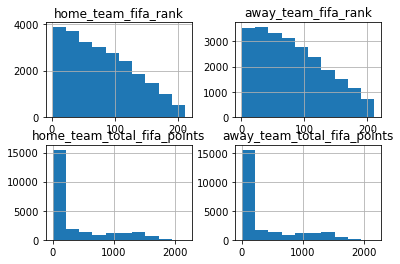

In [25]:
#histogram 
data.hist()
plt.show()

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

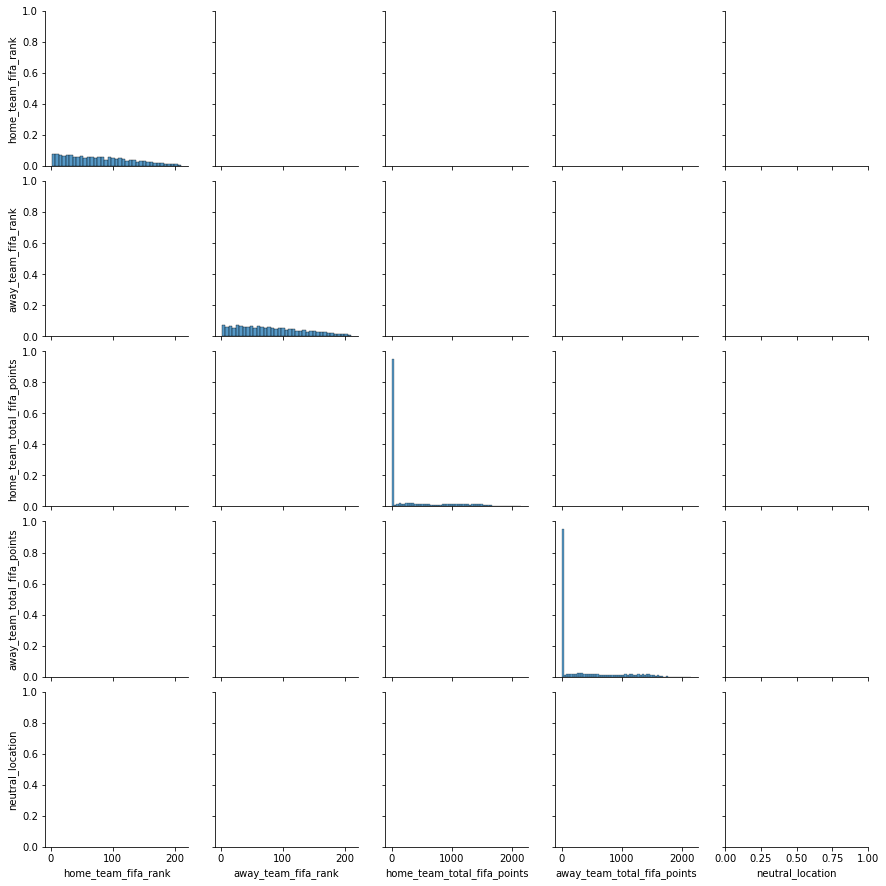

In [26]:
#multivariate plot
sns.pairplot(data)

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

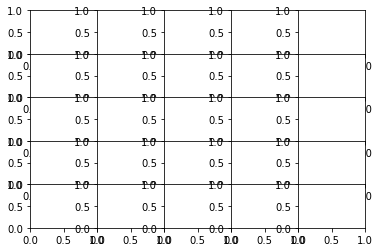

In [27]:
#scatter plot
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

C:\Users\62895\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_team_fifa_rank', ylabel='count'>

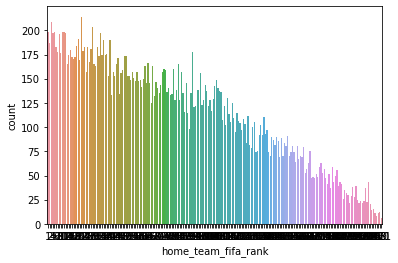

In [28]:
sns.countplot(data['home_team_fifa_rank'])

In [29]:
Ubah data dengan tipe data object menjadi numerical dengan menggunakan Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
#backup dataset
dataset = data.copy()
#encode categorical data 
ordnl_enc = OrdinalEncoder()
data[['shoot_out']] = ordnl_enc.fit_transform(data[['shoot_out']])

SyntaxError: invalid syntax (2248729455.py, line 1)

In [30]:
#splitting validation
array = dataset.values
x = array[:,0:6]
y = array[:,-1]
x

NameError: name 'dataset' is not defined

In [31]:
y

NameError: name 'y' is not defined

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=3)

NameError: name 'x' is not defined

In [33]:
x_train

NameError: name 'x_train' is not defined

In [34]:
x_test

NameError: name 'x_test' is not defined

In [35]:
y_test

NameError: name 'y_test' is not defined

In [36]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [37]:
y_predict = logistic_model.predict(x_test)
y_predict

NameError: name 'x_test' is not defined

In [38]:
cm = confusion_matrix(y_test, y_predict)
cm

NameError: name 'y_test' is not defined

In [39]:
sns.heatmap(cm, annot=True)

NameError: name 'cm' is not defined

In [40]:
print(classification_report(y_test,y_predict))

NameError: name 'y_test' is not defined

In [41]:
print("accuracy : ", logistic_model.score(x_test,y_test))

NameError: name 'x_test' is not defined

In [42]:
#individual prediction
sample = np.array([10,1,100,100,1,100])
sample1 = sample.reshape(1,-1)
logistic_model.predict(sample1)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [43]:
import pickle
Pkl_Filename = "logistic_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(logistic_model, file)

In [ ]:
#load back
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)
Pickled_LR_Model